<a href="https://colab.research.google.com/github/lightituphome/Insurance-linear-regression-/blob/main/Insurance(linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn import metrics

In [ ]:
from google.colab import files
files.upload()

Saving insurance dataset.csv to insurance dataset.csv


{'insurance dataset.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no

In [ ]:
dataset=pd.read_csv('insurance dataset.csv')

In [ ]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>

Data Analysis

In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-11-56efdecc888a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


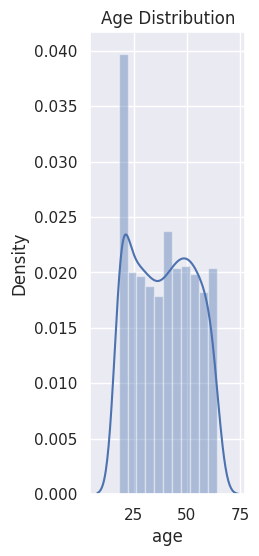

In [ ]:
sns.set()
plt.figure(figsize=(2,6))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

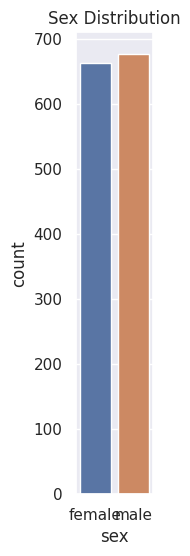

In [ ]:
plt.figure(figsize=(1,6))
sns.countplot(x='sex',data=dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-14-3808732470cd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


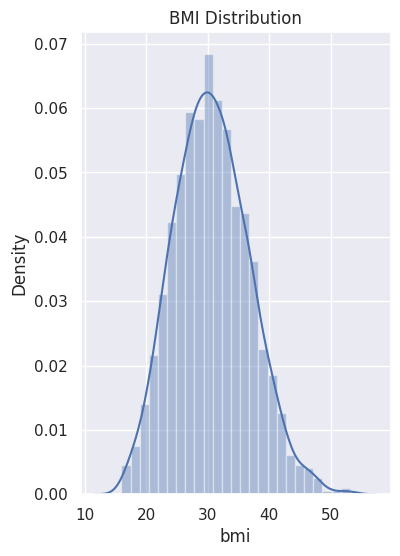

In [ ]:
plt.figure(figsize=(4,6))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

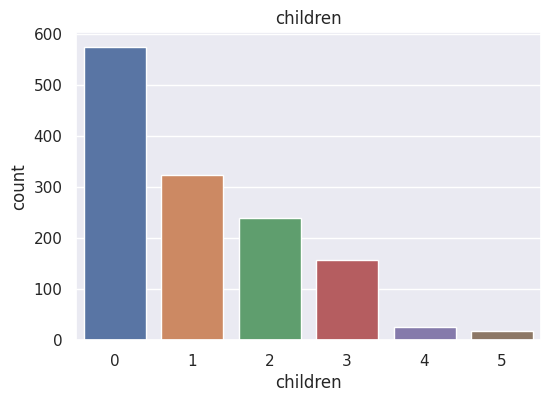

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='children',data=dataset)
plt.title('children')
plt.show()

In [ ]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

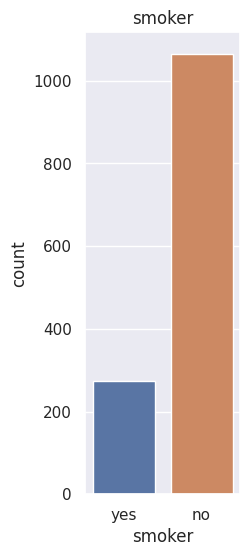

In [ ]:
plt.figure(figsize=(2,6))
sns.countplot(x='smoker',data=dataset)
plt.title('smoker')
plt.show()

In [ ]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

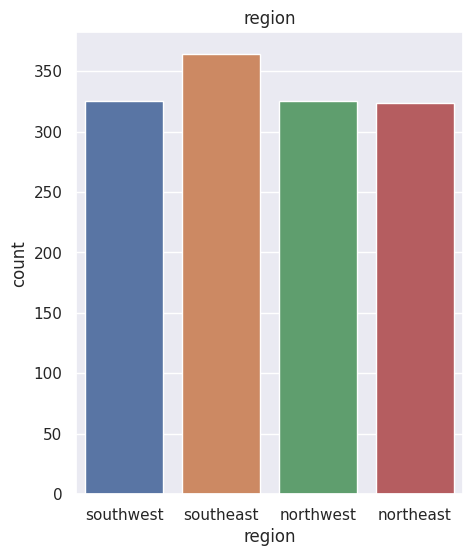

In [ ]:
plt.figure(figsize=(5,6))
sns.countplot(x='region',data=dataset)
plt.title('region')
plt.show()

In [ ]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 600x900 with 0 Axes>

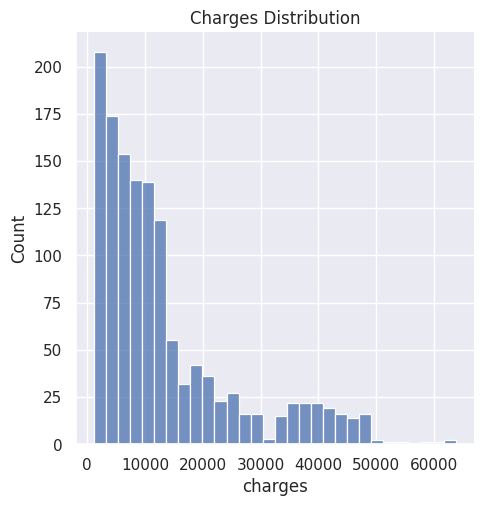

In [ ]:
sns.set()
plt.figure(figsize=(6,9))
sns.displot(dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Preprocessing

Encoding the categories features

In [ ]:
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

In [ ]:
dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [ ]:
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splting the features and target

In [ ]:
x=dataset.drop(columns='charges',axis=1)
y=dataset['charges']

In [ ]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splting the data training data testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
training_data_prediction=model.predict(x_train)

In [ ]:
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [ ]:
test_data_prediction=model.predict(x_test)

In [ ]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7447273869684076


In [ ]:
input_data=(60,1,25.84,0,1,3)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[11720.56103232]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print('The insurance is USD',prediction[0])

The insurance is USD 11720.561032318896
